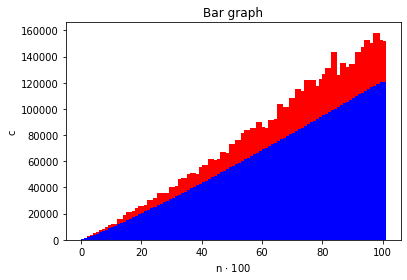

In [149]:
from matplotlib import pyplot as plt 
from functools import reduce

def algorithm_summary(file: str):
    with open(file) as file:
        comparisons = [[] for _ in range(0, 100)]
        swaps = [[] for _ in range(0, 100)]
        time = [[] for _ in range(0, 100)]

        for line in file:
            line = line.strip().split()
            # print(line)
            if len(line) < 4:
                break;
            n = int(int(line[0])/100)-1
            
            comparisons[n].append(int(line[1]))
            swaps[n].append(int(line[2]))
            time[n].append(float(line[3]))
        
        comparisons_avg = []
        for comp in comparisons:
            sum_ = reduce(lambda a,b : a+b, comp)
            avg = sum_ / len(comp)
            comparisons_avg.append(avg)
        
        swaps_avg = []
        for swap in swaps:
            sum_ = reduce(lambda a,b : a+b, swap)
            avg = sum_ / len(swap)
            swaps_avg.append(avg)

        time_avg = []
        for t in time:
            sum_ = reduce(lambda a,b : a+b, t)
            avg = sum_ / len(t)
            time_avg.append(avg)
        
        comps_over_n = []
        i = 100
        for c in comparisons_avg:
            comps_over_n.append(c * 1.0 / i)
            i += 100

        swaps_over_n = []
        i = 100
        for s in swaps_avg:
            swaps_over_n.append(s * 1.0 / i)
            i += 100

        return (comparisons_avg, swaps_avg, time_avg, comps_over_n, swaps_over_n)

quick_c, quick_s, quick_t, quick_c_n, quick_s_n = algorithm_summary('ex-2-stats/quick-k-1.log')
merge_c, merge_s, merge_t, merge_c_n, merge_s_n = algorithm_summary('ex-2-stats/merge-k-1.log')
# insert_c, insert_s, insert_t, insert_c_n, insert_s_n = algorithm_summary('ex-2-stats/insert-k-1.log')

x = list(range(1, 101))

plt.bar(x, quick_c, align='center', color='red', width=2)
plt.bar(x, merge_c, align='center', color='blue', width=2)
plt.title('Bar graph')
plt.ylabel('c')
plt.xlabel('n $\cdot$ 100')
plt.show()
